In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
D1= 50
D2 = 50
lam = 670e-7
A = 0.04
a = 0.01
d = 0.1

N = 100000

In [24]:
#Intereferencia de Fresnel

x_muestras = np.random.uniform(-A/2, A/2, N)
y_muestras = np.concatenate([
    np.random.uniform(-d/2 - a/2, -d/2 + a/2, N // 2),
    np.random.uniform(d/2 - a/2, d/2 + a/2, N // 2)
])

z_muestras = np.linspace(-0.4, 0.4, 500)

def integral_Fresnel(x_muestras, y_muestras, z, D1, D2, lam):
    parte_1 = (2 * np.pi / lam) * (D1 + D2)
    parte_xy = (np.pi / (lam * D1)) * (x_muestras - y_muestras) ** 2
    parte_zy = (np.pi / (lam * D2)) * (z - y_muestras) ** 2 

    integral = np.sum(np.exp(1j * (parte_1 + parte_xy + parte_zy))) / N
    return np.abs(integral) ** 2

intensidad_f = np.array([integral_Fresnel(x_muestras, y_muestras, z, D1, D2, lam) for z in z_muestras])
intensidad_normalizada_f = intensidad_f/np.max(intensidad_f)

In [25]:
#Modo Clásico

angulo = np.arctan(z_muestras/D2)

intensidad_c = (np.cos(((np.pi * d)/lam)*np.sin(angulo)))**2 * (np.sinc((a/lam)*np.sin(angulo)))**2

intensidad_normalizada_c = intensidad_c/np.max(intensidad_c)


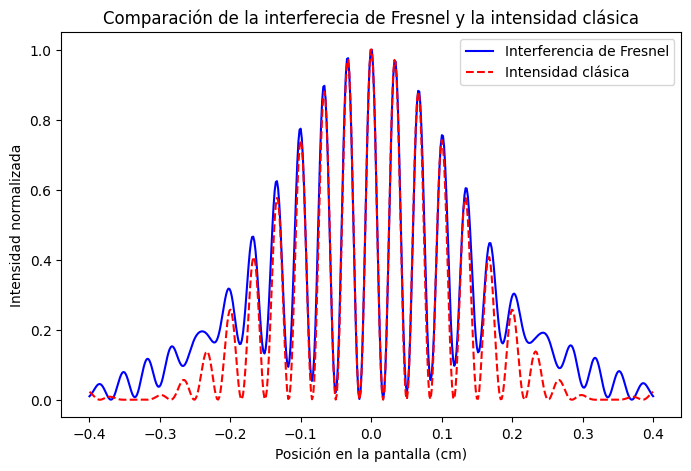

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(z_muestras, intensidad_normalizada_f, label='Interferencia de Fresnel', color='b')
plt.plot(z_muestras, intensidad_normalizada_c, label='Intensidad clásica', linestyle='--', color='r')
plt.xlabel("Posición en la pantalla (cm)")
plt.ylabel("Intensidad normalizada")
plt.legend()
plt.title("Comparación de la interferecia de Fresnel y la intensidad clásica")
plt.savefig("2.pdf")